# Milestone 1 - Data Visualization Complementary Views 

## Author - Eowyn Baughman



## Instructions
1. Create different complementary views of data by applying multiple chart types and aesthetics.
2. Project multiple dimensions using conditioning or faceting (e.g. small multiples) on both categorical and numeric variables.

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Jittered Head Count information:

* GameCode: 2 digit game code.
* DateFormat: Date
* Hour: 0-23 of the day
* TabelsOcc:  Number of Tables Occupied in the casino
* TablesOpen: Number of tables open in the casino. This number can be different than occupied because the pit boss can open a table and no one can be sitting at it.
* Tables Closed: Number of tables closed in the casino.
* HeadCount: Total Count of people at the hour, day, and table type
* DayOfWeek: 1-7.  1 = Monday, 7 = Sunday.
* DayNumber 1-366:  Day of year.  Not really needed, but note that the dates start in September.

In [2]:
# Load the dataset and print summary statistics on the numeric variables, and type info on all variables
filename = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/JitteredHeadCount.csv'
headcount_df = pd.read_csv(filename)
print(headcount_df.describe())
print(headcount_df.head())
print(headcount_df.dtypes)

                Hour      TablesOcc     TablesOpen   TablesClosed  \
count  175677.000000  175677.000000  175677.000000  175677.000000   
mean       11.504431       2.074591       2.555804       1.853430   
std         6.922330       3.307518       3.673229       2.993767   
min         0.000000       0.000000       0.000000       0.000000   
25%         6.000000       0.000000       1.000000       0.000000   
50%        12.000000       1.000000       1.000000       1.000000   
75%        18.000000       2.000000       3.000000       3.000000   
max        23.000000      24.000000      24.000000      23.000000   

           HeadCount      DayOfWeek      DayNumber  
count  175677.000000  175677.000000  175677.000000  
mean        7.390228       3.992953     183.434303  
std        12.458613       1.997989     105.702167  
min         0.000000       1.000000       1.000000  
25%         0.000000       2.000000      92.000000  
50%         3.000000       4.000000     183.000000  
75%    

In [3]:
# Set up a proper DateTime index so we can do resampling, etc taking advantage of the DateTimeIndex methods in pandas
headcount_df['HrStr'] = headcount_df.Hour.apply(str)+":00"
headcount_df.set_index(pd.to_datetime(headcount_df.DateFormat + ' ' + headcount_df.HrStr), inplace = True)

There are 4 columns that are not aspects of time: GameCode (2-char string), TablesOcc (integer for occupied tables), TablesOpen (integer for number of open tables), TablesClosed (integer for # of closed tables), and Headcount (integer for number of people at a game table at a time). 

In [4]:
# I performed a randomized resampling to reduce the clutter in later plots. Prior to doing this, I ran all my figures through
# with all the data and printed the results. I compared those with the resampled results and confirmed that the distributions,
# means, ranges, outlier characteristics, etc were unchanged by the resample. Plots are just easier to read.

# First make a copy of the data - I am not manipulating the data so the shallow Pandas version of copy is fine
headcount_bck = headcount_df.copy(deep=True)
# Pick out a random sample equal to 30% of the data, using my favorite number as the seed.
headcount_df = headcount_df.sample(frac=0.3, random_state = 42)

In [5]:
# Print the summary statistics again as a sanity check on the randomeness of the resample. Looks good!
headcount_df.describe()

,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
count,52703.000000,52703.000000,52703.000000,52703.000000,52703.000000,52703.000000,52703.000000
mean,11.514923,2.093069,2.575755,1.857427,7.437850,3.993663,183.477658
std,6.919831,3.329628,3.702273,2.990595,12.497508,2.004851,105.920242
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,6.000000,0.000000,1.000000,0.000000,0.000000,2.000000,92.000000
50%,12.000000,1.000000,1.000000,1.000000,3.000000,4.000000,183.000000
75%,18.000000,2.000000,3.000000,3.000000,8.000000,6.000000,275.000000
max,23.000000,24.000000,24.000000,23.000000,109.000000,7.000000,366.000000


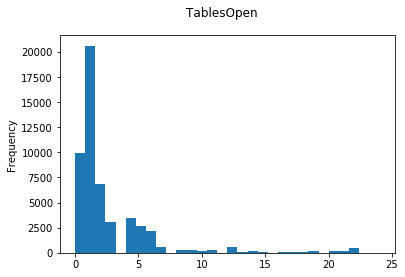

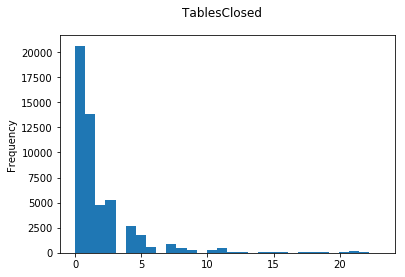

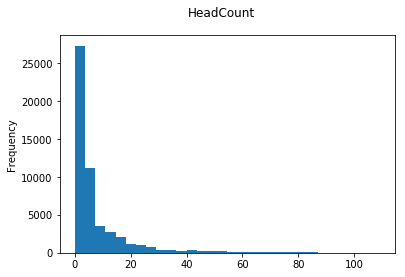

In [6]:
# Mean of 1 and max of 23,24 on TablesOcc and TablesOpen and TablesClosed makes me wonder if there are outliers. Ditto HeadCount.
# Let's plot histograms of all numeric variables and check out the distributions
cols = ["TablesOcc", "TablesOpen", "TablesClosed", "HeadCount"]
%matplotlib inline
for col in cols[1:]:
    fig = plt.figure()
    headcount_df.loc[:,""+col].plot.hist(bins = 30)
    fig.suptitle(col)

There are outliers, certainly, but I will not be cleansing the data because I don't want to remove valid entries for when the casino was especially busy. It would appear the casino has wide latitude in how many tables they have running at any given time, presumably in response to fluctuations in demand. Each of the distributions clusters at small numbers close to zero, with long right tails for the very busy periods. 

# Insight 1: 
**A lot of games are played at tables with few people, and a lot of tables are empty, but some times are very busy.**

In [7]:
# OK what about the 1 object variables? Let's explore
headcount_df['counts'] = 1
print(headcount_df[['counts',"GameCode"]].groupby(["GameCode"]).agg("count"))

          counts
GameCode        
BA            39
C4          2597
CR          2573
DH          2545
FP          2723
LI          2668
MI          2580
MQ          2614
MR          2661
MS            38
ND          2661
PA          2608
PG          2598
RO          2620
RR          2612
S6          2656
SH          2662
TH          2649
TL          2629
TP          2709
UT          2635
WR          2626


* Based on the entire complement of data:
* GameCode is pretty evenly distributed with most codes appearing 8778 times.
* BA, MI, and MS are the exceptions with 118, 8630, and 147 appearances respectively
* The interesting thing about it will be, when are these games most popular (time of day, day of week)?
* These observations hold true, but in reduced quantity, as a result of random sampling

Text(0.5,1,'Time series of All Variables')

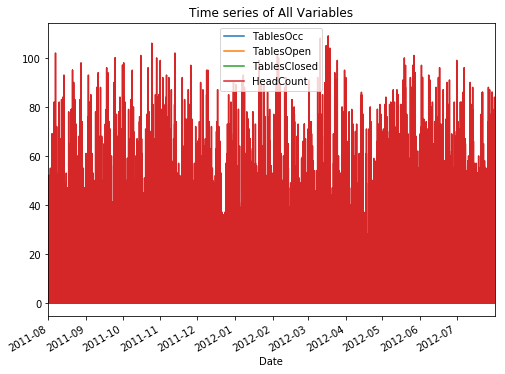

In [8]:
# How do variables vary over time? Is there a seasonal dependence? Let's make a time series plot! 

df = headcount_df.drop(['counts', 'Hour','DayOfWeek','DayNumber','DateFormat','HrStr'], axis = 1)
ax = plt.figure(figsize=(8, 6)).gca() # define axis
df.plot(ax = ax)
ax.set_xlabel('Date')
ax.set_ylabel('')
ax.set_title('Time series of All Variables')

Text(0.5,1,'Time series of Monthly Medians: All Variables')

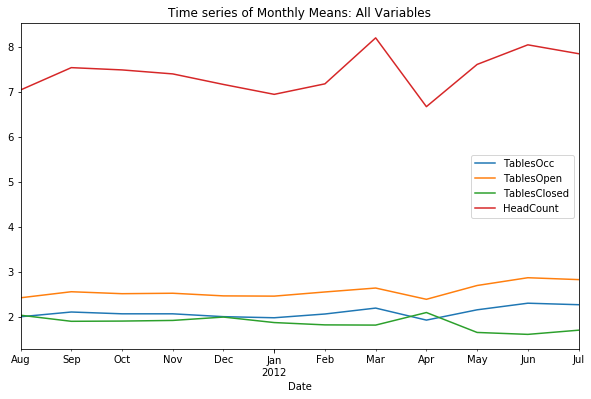

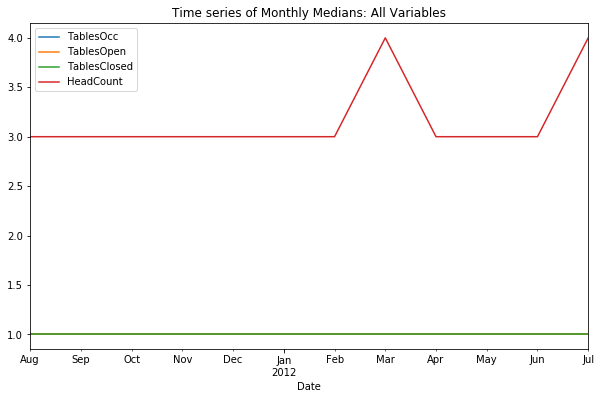

In [9]:
# That is way too compact. Let's take a monthly resample. This will give us insight into the seasonality, if any.

# Resample by mean, as that is most interesting for this data
df_monthly = df.resample('M').mean()
ax = plt.figure(figsize=(10, 6)).gca() # define axis
df_monthly.plot(ax = ax)
ax.set_xlabel('Date')
ax.set_title('Time series of Monthly Means: All Variables')

# Plot median, but it is not very interesting
df_monthly = df.resample('M').median()
ax = plt.figure(figsize=(10, 6)).gca() # define axis
df_monthly.plot(ax = ax)
ax.set_xlabel('Date')
ax.set_title('Time series of Monthly Medians: All Variables')

There is a full year of data. The figures above make it clear that the median occupancy is very steady -- most variables do not change at all in their monthly averages, and mean headcount only increases by 1 in a single month, March. The mean had greater variability, and is always higher than the median. This is a consequence of the high frequency of small-headcount events we saw in the histograms above. The mean headcount also peaks in March, and minimizes in April. 

From the difference between mean and median, the overall steadiness of the monthly time series, and the long right tails in each of these distributions, I suspect we will see the big swings (ie high variability) on an hourly or day-of-week basis.

# Insight 2: 
**Numeric variables are very steady on a monthly-mean and -median basis -- intra-annual variability/seasonality is very weak in this data. Variability must therefore be occurring at smaller time scales (hour, day).**

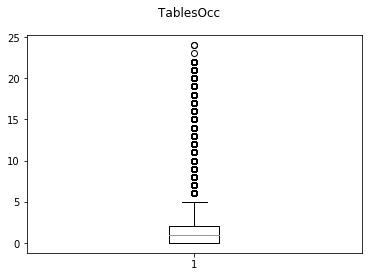

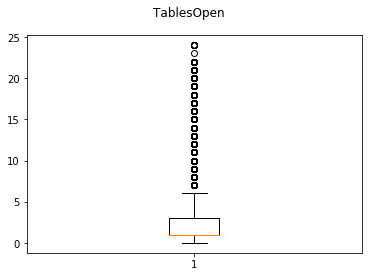

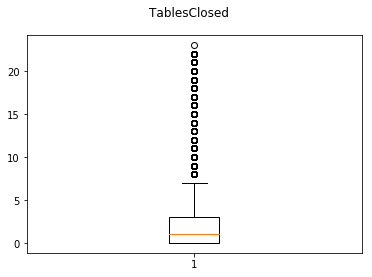

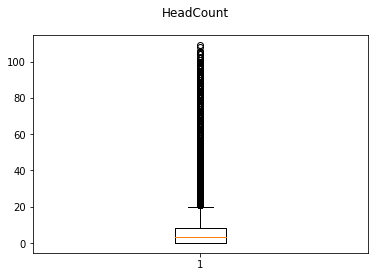

In [10]:
# Box plots of numeric variabls.
# These show the same thing as the histograms above - very leftward distns with long right tails
cols = list(df)
%matplotlib inline
for col in cols[1:]:
    fig = plt.figure()
    plt.boxplot(df.loc[:,""+col])
    fig.suptitle(col)

The boxplot figures show that the data are bound at zero and clustered at low values, but with very long rightward tails with many outliers. Headcount has the greatest number of outliers. These figures show similar information as the histogram/distribution plots, and suggest the kind of mean & median monthly averages we saw.

We have a broad overview of the data, including a look at seasonality, but we haven't gotten much insight into the following:
* Variability of the GameCode feature
* Variations sliced by hour of day
* Variations sliced by day of week

In [11]:
# Explore game code vs the numeric variables. We saw count already, and it wasn't very interestin.apply(lambda x: x.sort_order(ascending=False))g
cols = ["TablesOcc", "TablesOpen", "TablesClosed", "HeadCount"]
for col in cols[1:]:
    print((headcount_df[[""+col, 'GameCode']].groupby(['GameCode']).agg("mean").sort_values(by=[""+col], ascending=False)))

          TablesOpen
GameCode            
S6         13.518449
TP          6.687339
SH          4.100301
DH          3.837328
RO          3.619466
FP          3.452809
CR          3.448115
LI          2.658546
MR          1.710635
MS          1.289474
UT          1.152182
ND          1.006764
PG          0.996921
C4          0.959954
MI          0.904264
TH          0.893922
TL          0.662609
RR          0.636294
BA          0.487179
WR          0.437167
MQ          0.410099
PA          0.174463
          TablesClosed
GameCode              
S6            8.510919
TP            5.312661
SH            4.468820
ND            2.959414
CR            2.552662
RO            2.380534
DH            2.240079
FP            1.547191
LI            1.341829
MR            1.289365
TH            0.854285
PA            0.825537
MS            0.710526
MQ            0.589901
WR            0.562833
BA            0.512821
RR            0.363706
TL            0.337771
MI            0.334884
C4           

Interesting! On all the table-count related numerics (TablesOcc, TablesOpen, TablesClosed) S6, TP, and SH are the 1,2,3 largest means. On HeadCount, S6 is still the largest mean, but CR is 2nd largest and TP is 3rd; SH is bumped to 6th. 

# Insight 3: 
**SH is some game played by a lot of tables but with few numbers of people per game, while S6 and TP are very popular, played at a lot of large (many players) tables. CR is played at fewer tables, but has a lot of people per game.**

C:\Users\eowyn\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


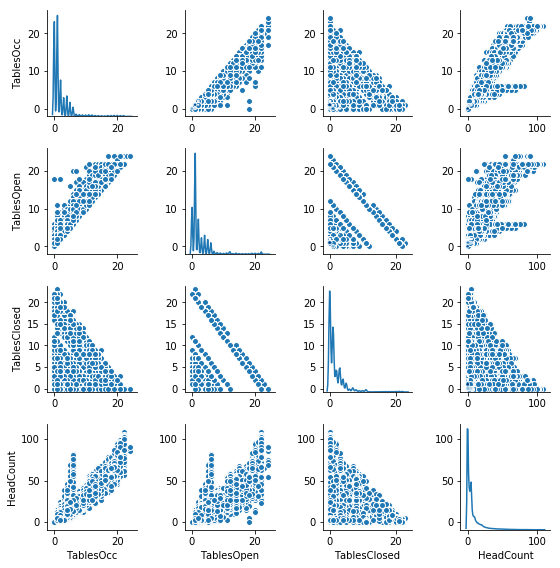

In [12]:
# Examine the correlations in the first of two ways: Scatter plots. The pairwise plot also shows
# distributions on the diagnonal in the form of kernel density plots. This figure runs very slowly. 
%matplotlib inline
cols = ["TablesOcc", "TablesOpen", "TablesClosed", "HeadCount"]
sns.pairplot(headcount_df.loc[:, cols], 
             palette="seismic", diag_kind = "kde", 
             size=2).map_upper(sns.kdeplot, cmap="Blues")

              TablesOcc  TablesOpen  TablesClosed  HeadCount
TablesOcc      1.000000    0.973745      0.091705   0.934586
TablesOpen     0.973745    1.000000      0.123173   0.891089
TablesClosed   0.091705    0.123173      1.000000   0.043298
HeadCount      0.934586    0.891089      0.043298   1.000000


(array([ 0.5,  1.5,  2.5,  3.5]), <a list of 4 Text xticklabel objects>)

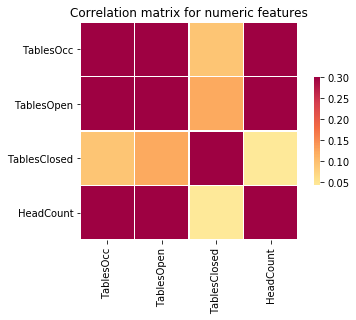

In [13]:
# The previous plot gives us a graphical sense of the correlations. Let's examine a heat map of the same, and numeric r values:
numeric_corr = headcount_df.loc[:,cols].corr()
print(numeric_corr)
sns.heatmap(numeric_corr, vmax=.3, center=0,
            square=True, linewidths=.25, cbar_kws={"shrink": .5}, cmap="Spectral_r")
plt.title('Correlation matrix for numeric features')
plt.yticks(rotation='horizontal')
plt.xticks(rotation='vertical')

The previous 2 figures and table of correlations present different views of the same observation: that there exist strong correlations between Tables Occupied, Tables Open, and HeadCount. This suggests that the manager determining the availability of game tables is responding, on an hourly basis, to how many people want to play, essentially opening tables when existing tables are occupied. TablesClosed has a pretty weak relationship to the other variables which perhaps means tables are closed for reasons mainly unrelated to how busy it is, like maybe the space is needed to put food on, or something.

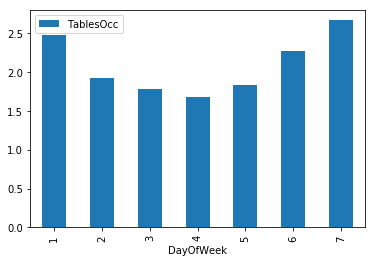

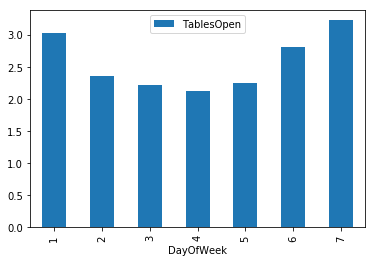

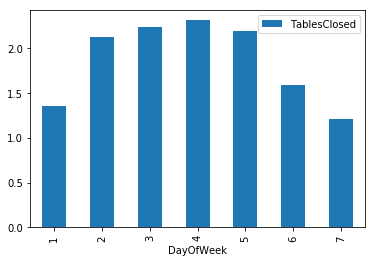

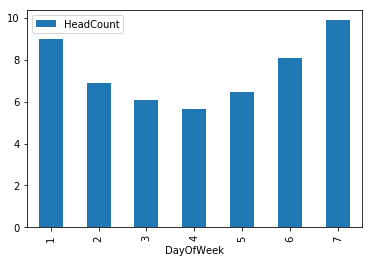

In [14]:
# At this point, I suspect the most interesting relationships are on day of week and hour of day. 
# Plot the mean of numerics according to the day of the week.
cols = ["TablesOcc", "TablesOpen", "TablesClosed", "HeadCount"]
%matplotlib inline
for col in cols:
    fig = plt.figure()
    fig.suptitle(col)
    headcount_df.loc[:, [""+col, 'DayOfWeek']].groupby(['DayOfWeek']).agg("mean").plot.bar()

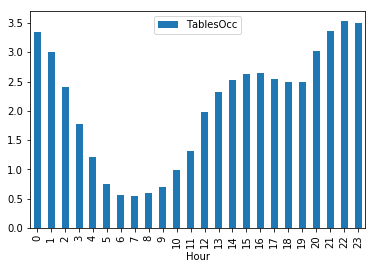

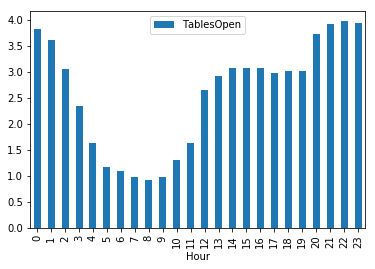

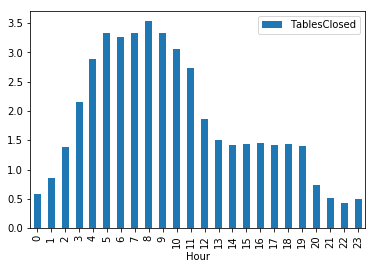

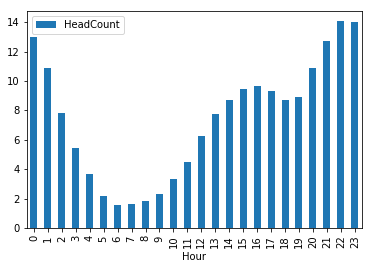

In [15]:
# And condition numeric variables on hour of day
cols = ["TablesOcc", "TablesOpen", "TablesClosed", "HeadCount"]
%matplotlib inline
for col in cols:
    fig = plt.figure()
    fig.suptitle(col)
    headcount_df.loc[:, [""+col, 'Hour']].groupby(['Hour']).agg("mean").plot.bar()

The hour of day and day of week plots are informative, as I suspected they would be. All the counts show a difference between weekend (Days 6, 7, 8) vs weekday (Days 0 - 5, inclusive) and between "morning" (hours 3-11), "afternoon" (hours 12-19), and "night" (hours 20-2). We can take advantage of these splits to apply aestetics to our visualizations. To do so, append descriptive features for TimeOfWeek ("weekday","weekend") and TimeOfDay ("morning","afternoon","evening")

In [16]:
# Add a cateogorical column TimeOfWeek
headcount_df.loc[:, "TimeOfWeek"] = (headcount_df.loc[:, "DayOfWeek"] > 5).astype(int)
headcount_df.loc[headcount_df.loc[:, "TimeOfWeek"] == 1, "TimeOfWeek"] = "Weekend"
headcount_df.loc[headcount_df.loc[:, "TimeOfWeek"] == 0, "TimeOfWeek"] = "Weekday"

In [17]:
# Add a categorical column TimeOfDay. Since there are 3 categories, use masks to assign values properly.
mask = (headcount_df.Hour > 2) & (headcount_df.Hour < 12)
headcount_df.loc[mask, "TimeOfDay"] = "Morning"
mask = (headcount_df.Hour > 11) & (headcount_df.Hour < 20)
headcount_df.loc[mask, "TimeOfDay"] = "Afternoon"
mask = (headcount_df.Hour > 19) | (headcount_df.Hour <3 )
headcount_df.loc[mask, "TimeOfDay"] = "Night"

Text(0.5,1,'Head Count vs. Occupied Tables \n with TimeOfWeek by color')

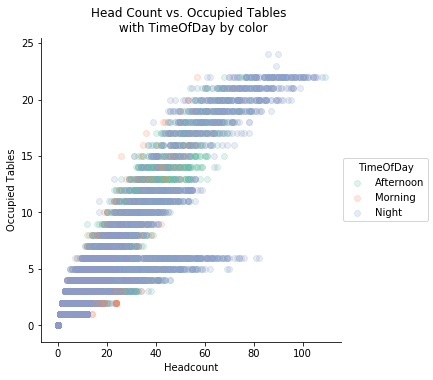

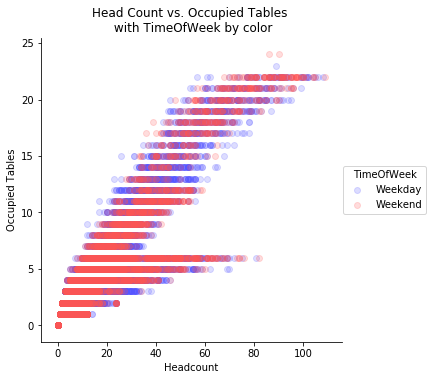

In [18]:
# Now let's try some aestetics based using our new categorical columns, TimeOfDay and DayOfWeek 

sns.lmplot(x = 'HeadCount', y = 'TablesOcc', 
           data = headcount_df, 
           hue = "TimeOfDay", 
           palette="Set2", 
           scatter_kws={'alpha':0.2},
           fit_reg = False)
plt.xlabel('Headcount')
plt.ylabel('Occupied Tables')
plt.title('Head Count vs. Occupied Tables \n with TimeOfDay by color')

sns.lmplot(x = 'HeadCount', y = 'TablesOcc', 
           data = headcount_df, 
           hue = "TimeOfWeek", 
           palette="seismic", 
           scatter_kws={'alpha':0.2},
           fit_reg = False)
plt.xlabel('Headcount')
plt.ylabel('Occupied Tables')
plt.title('Head Count vs. Occupied Tables \n with TimeOfWeek by color')

Very interesting! In general, there is a higher headcount and more tables open in the evening (and the afternoon, to an extent) than the morning, where games are usually played with fewer people. But there are games played at 5-6 tables (that's the mean, if you'll recalll from prior plots) with high headcount -- again, highest headcount in the evening, followed by afternoon, then morning in decreasing order. The morning is more distinct from the other two times of day than afternoon and evening, which bleed into one another -- something you'll see for yourself if you have "breakfast" in Vegas at 1pm.

There are a lot of people playing small-table format games on the weekend, vs the weekday. The weekend and weekday head count v occupied table relationships are pretty similar to one another in the general patterns: smaller format games in the morning, higher headcount games at night, and a second peak at ~6 tables, which is the mean -- this also tells us that for TablesOcc, the mean is not resulting from, say, lots of zeros weighing down a proponderance of some higher value; there truly are a lot of times when there are 6 tables occupied.

Text(0.5,1,'Head Count vs. Occupied Tables \n with TimeOfDay by color \n and TimeOfWeek as marker size')

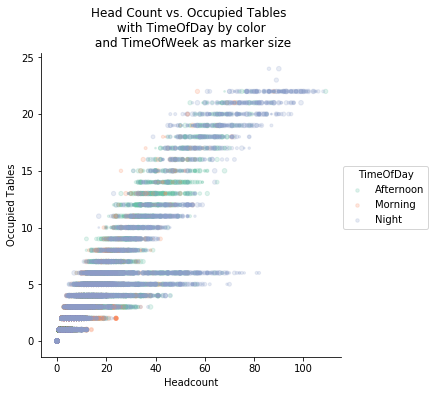

In [19]:
# Since we've confirmed the general pattern is pretty similar, we can safely combine the figures by showing TimeOfWeek as
# an aestetic, marker size, rather than as a separate figure. Scale the marker size for visibility. 
sns.lmplot(x = 'HeadCount', y = 'TablesOcc', 
           data = headcount_df, 
           hue = "TimeOfDay",
           palette="Set2", 
           scatter_kws={'s': 3*headcount_df.DayOfWeek, 'alpha': 0.2},
           fit_reg = False)
plt.xlabel('Headcount')
plt.ylabel('Occupied Tables')
plt.title('Head Count vs. Occupied Tables \n with TimeOfDay by color \n and TimeOfWeek as marker size')

# Insight 4:
This figure confirms the results from the previous pair of figures: **Small-headcount games are played largely in the morning at a relatively small number of tables, while large-format games are played at a large number of tables increasingly into the afternoon and night hours (a pattern that holds true even within the individual bins of TablesOcc e.g. at 6).**

'Done'

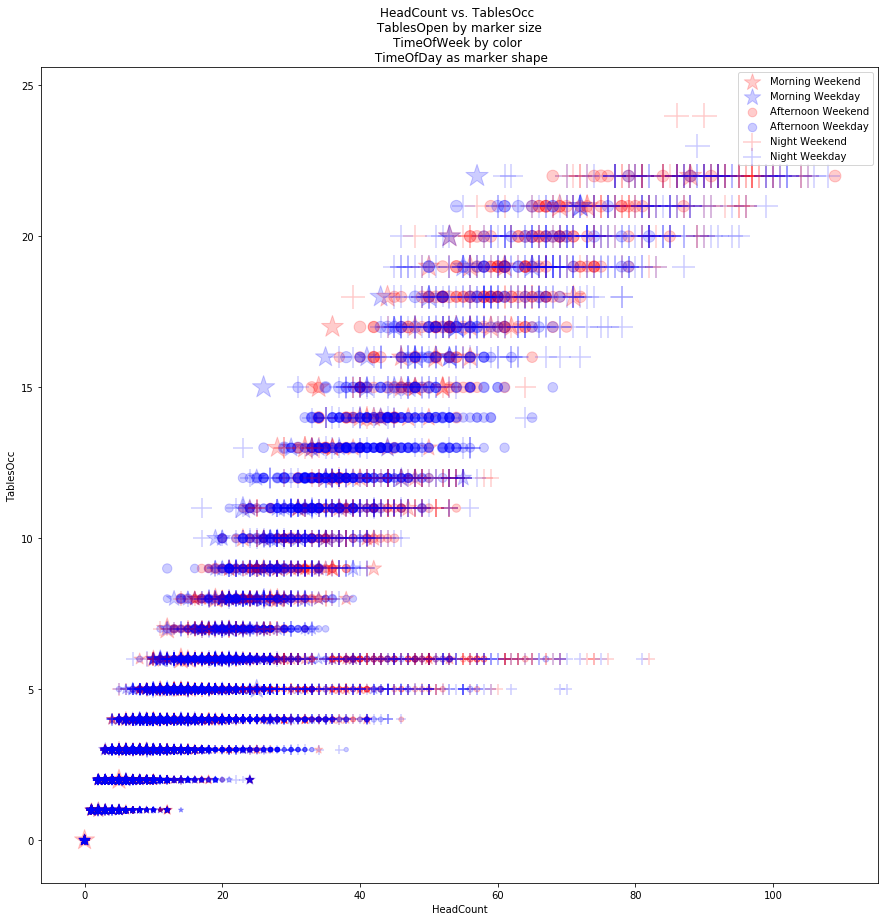

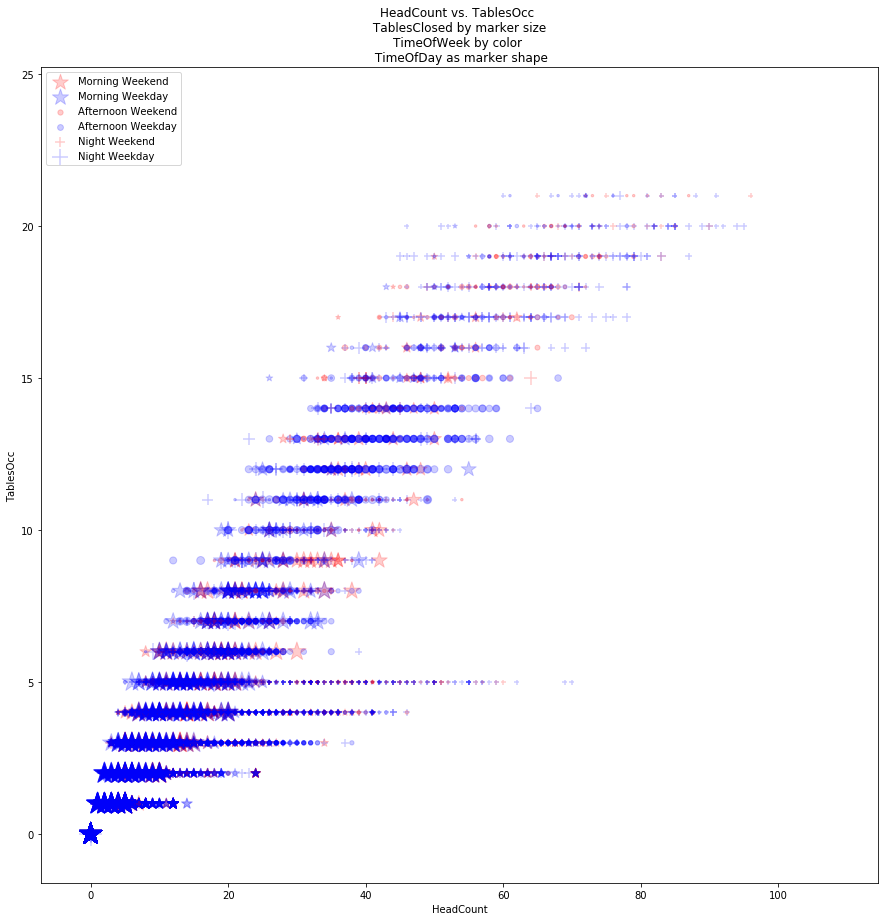

In [20]:
# The following function will plot var1 vs var2, size by var3 and scale, and apply color 
# and marker aestetics by markers and colors args
# The function has been generalized such that we can plot any combination we want
def plot_shapes(df, col1, markers, col2, colors, var1, var2, varSize, scale):
    import matplotlib.pyplot as plt
    import seaborn as sns
    ax = plt.figure(figsize=(15, 15)).gca() # define axis
    for val1 in markers: # iterate over dictioary keys
        for val2 in colors: # iterate over dictionary keys
            temp = df.loc[(df.loc[:, col1] == val1) & (df.loc[:, col2] == val2), :] # deternine which rows have val1 and val2
            sns.regplot(x = var1, y = var2, 
                        data = temp,  
                        fit_reg = False, 
                        scatter_kws={'color': colors[val2], #color based on val2
                                     'alpha':0.2, 
                                     's': scale*temp.loc[:, varSize]},
                        marker = markers[val1], # marker shape based on val1
                        label= val1 + " " + val2,
                        ax = ax)
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.title(var1 + ' vs. '+ var2 + ' \n ' + 
              varSize + ' by marker size \n' +
              col2 + ' by color \n ' + 
              col1 + ' as marker shape')
    plt.legend()
    return 'Done'

## Represent Insight 4 in another way, using marker shapes and colors, and adding the dimension TablesOpen and TablesClosed
# as the marker size. Scale for visibility.
colors = {'Weekend':'red', 'Weekday':'blue'}
markers = {'Morning':'*', 'Afternoon':'.', 'Night': '+'}
plot_shapes(headcount_df, 'TimeOfDay', markers, 'TimeOfWeek', colors, 'HeadCount', 'TablesOcc', 'TablesOpen', 25)
plot_shapes(headcount_df, 'TimeOfDay', markers, 'TimeOfWeek', colors, 'HeadCount', 'TablesOcc', 'TablesClosed', 25)


This pair of figures shows the same kinds of relationships highlighted in Insight 4, above, except now we are looking at the transition from stars -> circles -> crosses to represent morning-afternoon-night, while before we had colors for that. Now the colors are for weekend/weekday. These figures add in two extra pieces of information: TablesOpen and TablesClosed, which are represented by marker size. Recall from the correlation figures (pairwise and heat map) that TablesOpen is highly linearly correlated with HeadCount and TablesOccupied so it is to be expected that we find large size markers in the upper right corner of the upper figure. TablesClosed wasn't as correlated, and now we can see why: There are a large number of closed tables when headcount and occupancy are low, and the opposite when those are high - but there's also very few closed tables when tables occupied are less than ~6, which makes sense because we know those times can be pretty busy. That makes sense, but throws off the linear correlation.

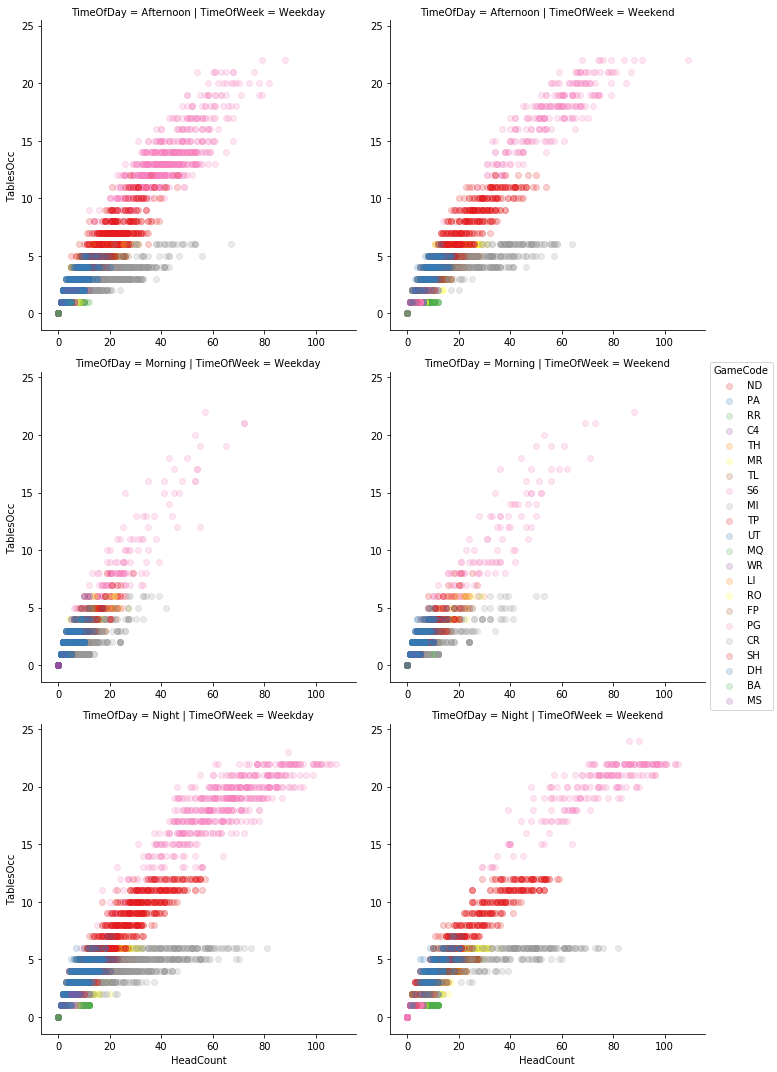

In [21]:
# Faceting on categorical variables
# These figures confirm the general patterns in occupancy and headcount by time of day, week. 
# And they give insight to which kinds of games are popular during those times. 
%matplotlib inline
g = sns.FacetGrid(headcount_df, 
                  col="TimeOfWeek", 
                  row='TimeOfDay', 
                  hue="GameCode", 
                  palette="Set1",
                  size = 5)
g = g.map(plt.scatter, "HeadCount", "TablesOcc", alpha = 0.2)
g.add_legend();

Now we are pretty much seeing the same kinds of patterns as we've seen before, but now we are coloring by game code to see what kinds of games are popular when, and at what kinds of tables. S6, the most popular game overall, accounts for most of the high-occupancy (12-25 tables), high-headcount (20-100+) gameplay which dominates in the afternoon and evening hours. TP is second-most popular in the afternoon and evening, and is played at ~10-12 tables at a time, headcount 20-40. TL is played at fewer tables -- that 4-6 peak in headcount which can go from 20-80, more so in the evening. Mornings have similar games but are just slower overall. The majority of games are played by relatively few people at relatively small tables, making up a big hodge-podge of miscellany. 

In [ ]:
# Let's make a facet plot of numerics vs GameCode as histograms
# This is another examle of faceting on a categorical variable.
sns.swarmplot(x="GameCode", y="TablesOcc", data=headcount_df)

Essentially, this figure is showing just the TablesOcc subset-set of the data we pulled out of the figures above. S6 most popular overall with 23 tables occupied, TP second most popular at 12. TL does not stand out on this plot, because it doesn't have a lot of tables, it has a lot of headcount.


In the last figure, we'll make heatmaps -- the kind where dark colors represent high frequency of 1 variable, the game code, plotted against one other. I tried TablesOpen, TablesClosed, TablesOcc, and HeadCount -- and TablesOcc was the most interesting. These are split it up by weekend/weekday and time of day to see how that looks. 

'Done'

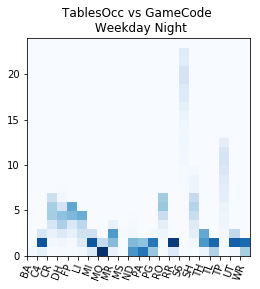

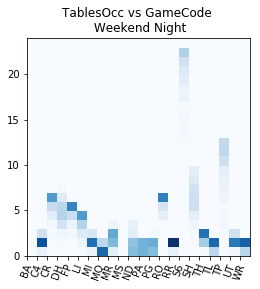

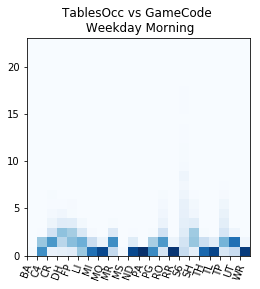

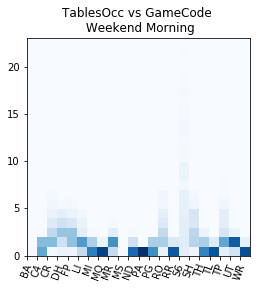

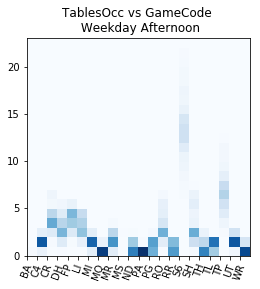

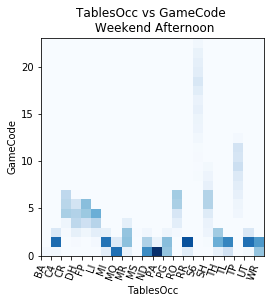

In [ ]:
# The TablesOcc variable is already binned, as seen in prior plots, so we can go straight to cross-tabulating
# This is not a single figure, so I won't call it a facet plot, but I am faceting/ conditioning on categorical features

time1 = {'Morning', 'Afternoon', 'Night'}
time2 = {'Weekend', 'Weekday'}
def plot_heatmaps(df, tcol1, time1, tcol2, time2, var1, var2):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    for val1 in time1: # iterate over dictioary keys
        for val2 in time2: # iterate over dictionary keys
            ax = plt.figure(figsize=(4, 4)).gca() # define axis
            temp = df.loc[(df.loc[:, tcol1] == val1) & (df.loc[:, tcol2] == val2), [var1, var2]] # deternine which rows have val1 and val2
            crossed = pd.crosstab(temp.loc[:,""+var1], temp.loc[:,""+var2])
            ax.pcolor(crossed, cmap = 'Blues')
            plt.title("{} vs {} \n {} {}".format(var1,var2,val2,val1))
            ax.set_xticks(range(crossed.shape[1]))
            ax.set_xticklabels(crossed.columns, rotation = 70)
    plt.xlabel(var1)
    plt.ylabel(var2)
    return 'Done'

plot_heatmaps(headcount_df, "TimeOfDay", time1, "TimeOfWeek", time2, "TablesOcc", "GameCode")

I wasn't sure if we would get any extra information from lookign at the same relationship yet another way, but we did! From this we can say that the "hodge-podge miscellany" of small-format, small-headcount games are being played all the time and then more popular, higher headcount games dominate during the nights and weekends.

# Insight 5:
**Small-format, small-headcount games are being played more or less constantly throughout the day and throughout the week - Similar to how we saw TL in the earlier plots. Then when business picks up in the evenings and weekends, it is largely being driven by the handful of games we saw in previous figures and tables - S6, TP, RO to a lesser extent.**